### NISHA JAIN

## The Sparks  Foundation - Internship

 # #TASK 1 -        Prediction using Supervised ML(Linear Regression)

### The aim of the project is to Predict the percentage of an student based on the no. of study hours.

#### Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

x(independent variable)=study hours,
y(dependent variable)=scores

#### Loading the dataset

In [3]:
df=pd.read_csv(r'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [4]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
df.shape

(25, 2)

#### Checking for Null Values

In [6]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

#### Dividing into Independent(x) and Dependent(y) Variable

In [49]:
#Independent Variable
x=df.Hours.values.reshape(-1,1)
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [50]:
x.shape

(25, 1)

In [51]:
#Dependent Variable
y=df.Scores.values
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [52]:
y.shape

(25,)

#### Relation Between Dependent and Independent Variable

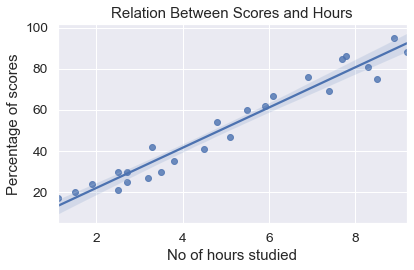

In [109]:
sns.set(font_scale=1.25)
ax=sns.regplot(x=df.Hours,y=df.Scores,data=df)
ax.set_title('Relation Between Scores and Hours')
plt.xlabel('No of hours studied')
plt.ylabel('Percentage of scores')
plt.tight_layout()
plt.show()

##### Above figure is depicting that there is a Linear Relationship between the variables as percentage of scores is increasing with the increasing study hours.

In [101]:
correlation=df.corr()
correlation

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


##### The Variables are highly positively correlated with each other

### Machine Learning Implementation

#### Splitting the data into Training and Testing data

In [53]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=.2,random_state=101) 

In [54]:
train_x.shape

(20, 1)

In [55]:
train_y.shape

(20,)

In [56]:
test_x.shape

(5, 1)

In [57]:
test_y.shape

(5,)

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
lm=LinearRegression()
lm

LinearRegression()

In [60]:
lm.fit(train_x,train_y)

LinearRegression()

In [62]:
predict=lm.predict(test_x)
predict

array([26.84539693, 77.45859361, 39.4986961 , 74.53860149, 56.04531809])

#### Comparing Actual VS Predicted


In [64]:
ActualVsPredictedDF=pd.DataFrame({'Actual':test_y,'Predicted':predict})
ActualVsPredictedDF

,Actual,Predicted
0,30,26.845397
1,85,77.458594
2,35,39.498696
3,69,74.538601
4,60,56.045318


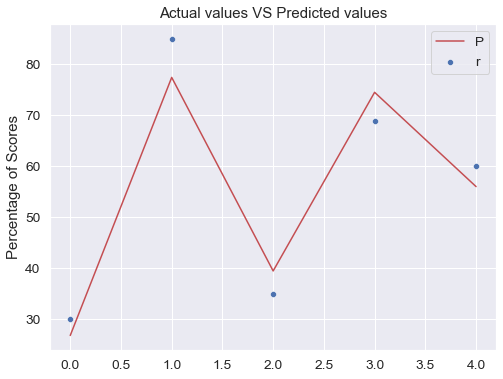

In [141]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=ActualVsPredictedDF.index,y=ActualVsPredictedDF.Actual)
ax=plt.plot(ActualVsPredictedDF.Predicted,color='r')
plt.ylabel('Percentage of Scores')
plt.legend('Predicted Data')
plt.title('Actual values VS Predicted values')
plt.show()

In [74]:
hours=9.25
array_hour=np.array(hours)
array_hour=array_hour.reshape(-1,1)
array_hour.shape

(1, 1)

In [111]:
# predicted score if a student is studied for 9.25hrs/day

SpecificHourValue=lm.predict(array_hour)
print(f"No of Hours = {array_hour}")
print(f"Predicted Score = {SpecificHourValue}")

No of Hours = [[9.25]]
Predicted Score = [92.54521954]


#### Model Evaluation using Mean Absolute Error

In [112]:
from sklearn import metrics
error=metrics.mean_absolute_error(test_y,predict)
print(f'Mean Absolute Error is {error}')

Mean Absolute Error is 4.937597792467705
